In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

C:\Users\Ben\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


,title,year
0,Orlando Vargas,2005
1,Niu-Peng,1989
2,Anandabhadram,2005
3,Mahendra Varma,1993
4,Beomdiga shidae,1970


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

C:\Users\Ben\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### What are the ten most common movie names of all time?

In [5]:
t = titles
t.title.value_counts().head(10)

Hamlet                  19
Carmen                  14
Macbeth                 14
The Three Musketeers    12
The Outsider            11
Blood Money             11
She                     11
Maya                    11
Kismet                  10
Borderline              10
Name: title, dtype: int64

### Which three years of the 1930s saw the most films released?

In [30]:
t[(t.year >= 1930) & (t.year <= 1940)].year.value_counts()#.sort_index()

1930     811
1931     871
1932     932
1933     878
1934     954
1935    1039
1936    1127
1937    1185
1938    1115
1939    1052
1940     982
Name: year, dtype: int64

In [7]:
ans2 = t[(t.year >= 1930) & (t.year <= 1940)].year.value_counts()
ans2a, ans2b, ans2c = ans2.index[0], ans2.index[1], ans2.index[2]

print("The three years of 1930 with the most films released were {}, {} and {}".format(ans2a, ans2b, ans2c))

The three years of 1930 with the most films released were 1937, 1936 and 1938


### Plot the number of films that have been released each decade over the history of cinema.

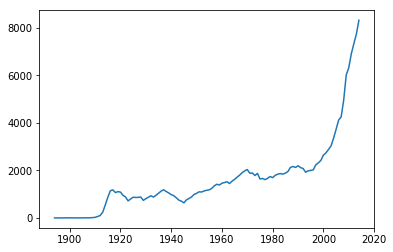

In [8]:
t[t.year<2015].year.value_counts().sort_index().plot()

### Plot the number of "Hamlet" films made each decade.

In [22]:
t[t.title == "Hamlet"].year //10*10

2249      2010
39041     1970
39461     2000
41940     1990
52546     1980
54748     2000
56646     2010
69544     1960
84570     2010
85485     1910
95505     2010
95605     1960
100923    1910
139892    1920
148866    1950
156599    1940
179411    1910
185183    1970
185646    1990
Name: year, dtype: int64

In [33]:
ans4 = t[t.title == "Hamlet"].year //10*10
ans4.value_counts()

2010    4
1910    3
1970    2
2000    2
1960    2
1990    2
1950    1
1980    1
1940    1
1920    1
Name: year, dtype: int64

In [34]:
ans4 = ans4.value_counts()
ans4.sort_index()

1910    3
1920    1
1940    1
1950    1
1960    2
1970    2
1980    1
1990    2
2000    2
2010    4
Name: year, dtype: int64

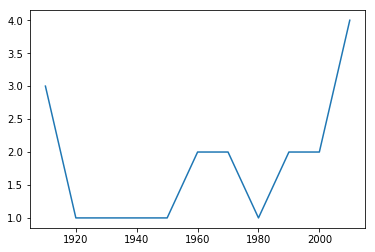

In [35]:
ans4 = ans4.sort_index()
ans4.plot()

### Plot the number of "Rustler" characters in each decade of the history of film.

In [37]:
c = cast
c.head(2)

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN


In [46]:
ans5 = c[c.character == "Rustler"].year //10 * 10#.value_counts().sort_index()

In [47]:
ans5.value_counts().sort_index()

1920     6
1930    84
1940    18
1950     8
1960     1
1970     9
1980     1
1990     4
2000     2
Name: year, dtype: int64

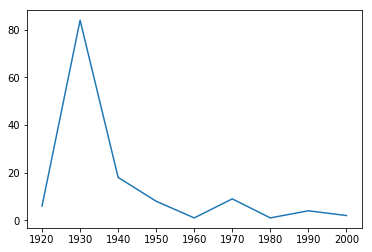

In [48]:
ans5 = ans5.value_counts().sort_index()
ans5.plot()

### Plot the number of "Batman" characters each decade.

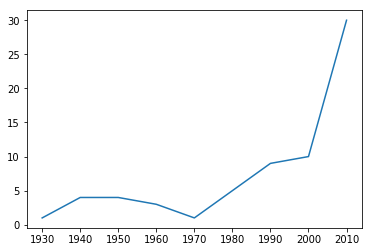

In [52]:
ans6 = c[c.character == "Batman"].year //10 * 10
ans6 = ans6.value_counts().sort_index()
ans6.plot()

### What are the 11 most common character names in movie history?

In [56]:
ans7 = c.character.value_counts().head(11)
ans7

Himself        18926
Dancer         11015
Extra           8638
Reporter        7593
Doctor          6803
Policeman       6470
Student         6390
Nurse           6127
Bartender       6123
Minor Role      5830
Party Guest     5820
Name: character, dtype: int64

In [59]:
ans7.index[0]

'Himself'

In [60]:
print("The three most popular characters are {}, {} and {}".format(ans7.index[0],ans7.index[1],ans7.index[2]))

The three most popular characters are Himself, Dancer and Extra


### Who are the 10 people most often credited as "Herself" in film history?

In [66]:
ans8 = c[c.character == "Herself"].name.value_counts().head(10)

Joyce Brothers        14
Queen Elizabeth II    11
Margaret Thatcher      8
Joan Rivers            7
Mary Jo Pehl           7
Caroline Rhea          5
Chris Evert            5
Rekha                  5
Juhi Chawla            5
Marilyn Monroe         5
Name: name, dtype: int64

In [67]:
ans8 = c[c.character == "Herself"].name.value_counts().head(10)
print("The top 3 people credited as herself are '{}','{}'and'{}'".format(ans8.index[0],ans8.index[1],ans8.index[2]))

The top 3 people credited as herself are 'Joyce Brothers','Queen Elizabeth II'and'Margaret Thatcher'


### Who are the 10 people most often credited as "Himself" in film history?

In [68]:
c[c.character == "Himself"].name.value_counts().head(10)

Adolf Hitler             93
Richard Nixon            39
Ronald Reagan            31
John F. Kennedy          26
Ron Jeremy               24
George W. Bush           20
Franklin D. Roosevelt    20
Winston Churchill        20
Bill Clinton             20
Martin Luther King       19
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [71]:
c[c.year==1945].name.value_counts().head(10)

Emmett Vogan       39
Sam (II) Harris    30
Bess Flowers       28
Harold Miller      28
Nolan Leary        27
Frank O'Connor     26
Edmund Cobb        24
Franklyn Farnum    24
Pierre Watkin      24
Tom London         24
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [74]:
c[c.year==2014].name.value_counts().head(10)

Omer Pasha               31
Eric Roberts             27
Joelle Koissi            25
Stuart (II) Matthews     21
Joseph (III) Oliveira    21
Michael Palin            21
Lloyd Kaufman            20
Chris Cowlin             20
Mindy Robinson           19
John Cleese              17
Name: name, dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

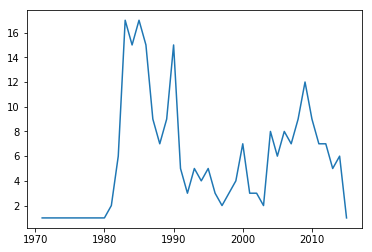

In [82]:
c[c.name == "Mammootty"].year.value_counts().sort_index().plot()

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [86]:
c[c.character.str.startswith("Patron in")].character.value_counts().head(10)

Patron in Frisky Rabbit         16
Patron in Chinese Restaurant     9
Patron in the Coffee House       9
Patron in Billiard Parlor        5
Patron in Bar                    4
Patron in cabaret                3
Patron in Club                   3
Patron in restaurant             3
Patron in Restaurant             3
Patron in Quiet Bar              2
Name: character, dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [87]:
c[c.character.str.startswith("Science")].character.value_counts().head(10)

Science Teacher         53
Science Student          8
Science Fair Student     8
Science Fair Judge       6
Science Reporter         5
Science Club Member      5
Science Promo Cadet      4
Science Kid              4
Science teacher          3
Science Officer          3
Name: character, dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

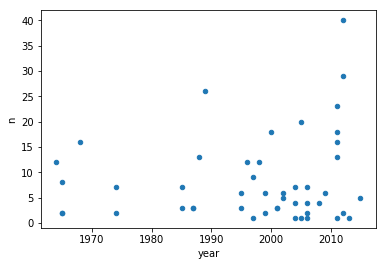

In [93]:
ans15 = c[c.name == "Judi Dench"]
ans15.plot(x = "year", y = "n", kind = "scatter")

### Plot the n-values of Cary Grant's roles through his career.

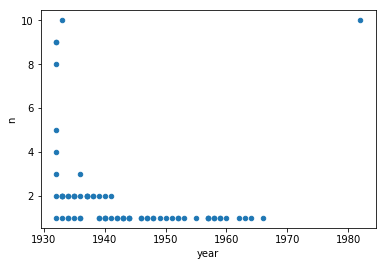

In [94]:
ans16 = c[c.name == "Cary Grant"]
ans16.plot(x = "year", y = "n", kind = "scatter")

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

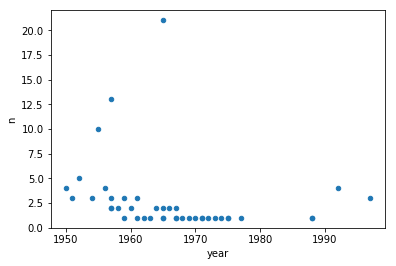

In [95]:
ans17 = c[c.name == "Sidney Poitier"]
ans17.plot(x = "year", y = "n", kind = "scatter")

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [100]:
len(c[(c.n ==1) & (c.year >=1950) & (c.year <= 1959)])

9188

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [101]:
len(c[(c.n ==2) & (c.year >=1950) & (c.year <= 1959)])

8776